<a href="https://colab.research.google.com/github/arunpranav-at/SolarOutputPredictor/blob/main/solaroutputpredictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

In [ ]:
df = pd.read_excel("solardatabyarunpranavat.xlsx")
df.head()

,datetime,tempmax(cel),tempmin(cel),temp(cel),feelslikemax(cel),feelslikemin(cel),feelslike(cel),dew,humidity,precip,...,cloudcover,visibility,solarradiation,solarenergy,uvindex,sunrise,sunset,conditions,icon,power(kwh)
0,2018-12-19,28.3,21.6,24.8,29.4,21.6,25.2,19.1,71.3,0.000,...,25.4,6.0,229.7,19.7,8,2018-12-19T06:25:43,2018-12-19T17:47:21,Partially cloudy,partly-cloudy-day,331.2
1,2018-12-20,30.0,21.9,26.0,34.1,21.9,27.5,21.9,79.0,0.000,...,45.3,5.5,223.0,19.3,8,2018-12-20T06:26:14,2018-12-20T17:47:50,Partially cloudy,partly-cloudy-day,978.5
2,2018-12-21,30.0,24.0,26.8,34.1,24.0,28.8,23.5,82.4,0.200,...,69.0,4.8,184.8,15.8,7,2018-12-21T06:26:44,2018-12-21T17:48:19,"Rain, Partially cloudy",rain,634.4
3,2018-12-22,30.0,25.0,27.7,35.1,25.0,30.2,23.3,77.7,0.000,...,68.2,4.6,141.5,12.2,5,2018-12-22T06:27:14,2018-12-22T17:48:49,Partially cloudy,partly-cloudy-day,829.4
4,2018-12-23,28.5,24.7,26.3,32.4,24.7,27.6,23.8,86.6,19.932,...,85.0,3.6,193.0,16.7,7,2018-12-23T06:27:43,2018-12-23T17:49:19,"Rain, Partially cloudy",rain,39.5


In [ ]:
df = df.drop(['datetime', 'tempmax(cel)', 'tempmin(cel)', 'feelslikemax(cel)', 'feelslikemin(cel)'], axis=1)
df.head()

,temp(cel),feelslike(cel),dew,humidity,precip,precipprob,precipcover,windspeed,winddir,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,sunrise,sunset,conditions,icon,power(kwh)
0,24.8,25.2,19.1,71.3,0.000,0,0.00,22.3,15.4,1014.4,25.4,6.0,229.7,19.7,8,2018-12-19T06:25:43,2018-12-19T17:47:21,Partially cloudy,partly-cloudy-day,331.2
1,26.0,27.5,21.9,79.0,0.000,0,0.00,14.8,27.4,1014.2,45.3,5.5,223.0,19.3,8,2018-12-20T06:26:14,2018-12-20T17:47:50,Partially cloudy,partly-cloudy-day,978.5
2,26.8,28.8,23.5,82.4,0.200,100,4.17,22.3,30.8,1013.2,69.0,4.8,184.8,15.8,7,2018-12-21T06:26:44,2018-12-21T17:48:19,"Rain, Partially cloudy",rain,634.4
3,27.7,30.2,23.3,77.7,0.000,0,0.00,25.9,52.5,1013.2,68.2,4.6,141.5,12.2,5,2018-12-22T06:27:14,2018-12-22T17:48:49,Partially cloudy,partly-cloudy-day,829.4
4,26.3,27.6,23.8,86.6,19.932,100,8.33,18.4,75.3,1013.9,85.0,3.6,193.0,16.7,7,2018-12-23T06:27:43,2018-12-23T17:49:19,"Rain, Partially cloudy",rain,39.5


In [ ]:
df['sunrise'] = pd.to_datetime(df['sunrise'])
df['sunset'] = pd.to_datetime(df['sunset'])

In [ ]:
df.head()

,temp(cel),feelslike(cel),dew,humidity,precip,precipprob,precipcover,windspeed,winddir,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,sunrise,sunset,conditions,icon,power(kwh)
0,24.8,25.2,19.1,71.3,0.000,0,0.00,22.3,15.4,1014.4,25.4,6.0,229.7,19.7,8,2018-12-19 06:25:43,2018-12-19 17:47:21,Partially cloudy,partly-cloudy-day,331.2
1,26.0,27.5,21.9,79.0,0.000,0,0.00,14.8,27.4,1014.2,45.3,5.5,223.0,19.3,8,2018-12-20 06:26:14,2018-12-20 17:47:50,Partially cloudy,partly-cloudy-day,978.5
2,26.8,28.8,23.5,82.4,0.200,100,4.17,22.3,30.8,1013.2,69.0,4.8,184.8,15.8,7,2018-12-21 06:26:44,2018-12-21 17:48:19,"Rain, Partially cloudy",rain,634.4
3,27.7,30.2,23.3,77.7,0.000,0,0.00,25.9,52.5,1013.2,68.2,4.6,141.5,12.2,5,2018-12-22 06:27:14,2018-12-22 17:48:49,Partially cloudy,partly-cloudy-day,829.4
4,26.3,27.6,23.8,86.6,19.932,100,8.33,18.4,75.3,1013.9,85.0,3.6,193.0,16.7,7,2018-12-23 06:27:43,2018-12-23 17:49:19,"Rain, Partially cloudy",rain,39.5


In [ ]:
df['daylight'] = (df['sunset'] - df['sunrise']).dt.total_seconds() / 3600
df['solaroutput(kwh)'] = df['power(kwh)']

In [ ]:
df.head()

,temp(cel),feelslike(cel),dew,humidity,precip,precipprob,precipcover,windspeed,winddir,sealevelpressure,...,solarradiation,solarenergy,uvindex,sunrise,sunset,conditions,icon,power(kwh),daylight,solaroutput(kwh)
0,24.8,25.2,19.1,71.3,0.000,0,0.00,22.3,15.4,1014.4,...,229.7,19.7,8,2018-12-19 06:25:43,2018-12-19 17:47:21,Partially cloudy,partly-cloudy-day,331.2,11.360556,331.2
1,26.0,27.5,21.9,79.0,0.000,0,0.00,14.8,27.4,1014.2,...,223.0,19.3,8,2018-12-20 06:26:14,2018-12-20 17:47:50,Partially cloudy,partly-cloudy-day,978.5,11.360000,978.5
2,26.8,28.8,23.5,82.4,0.200,100,4.17,22.3,30.8,1013.2,...,184.8,15.8,7,2018-12-21 06:26:44,2018-12-21 17:48:19,"Rain, Partially cloudy",rain,634.4,11.359722,634.4
3,27.7,30.2,23.3,77.7,0.000,0,0.00,25.9,52.5,1013.2,...,141.5,12.2,5,2018-12-22 06:27:14,2018-12-22 17:48:49,Partially cloudy,partly-cloudy-day,829.4,11.359722,829.4
4,26.3,27.6,23.8,86.6,19.932,100,8.33,18.4,75.3,1013.9,...,193.0,16.7,7,2018-12-23 06:27:43,2018-12-23 17:49:19,"Rain, Partially cloudy",rain,39.5,11.360000,39.5


In [ ]:
df=df.drop(['sunrise', 'sunset', 'power(kwh)'], axis=1)

In [ ]:
df.head()

,temp(cel),feelslike(cel),dew,humidity,precip,precipprob,precipcover,windspeed,winddir,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,conditions,icon,daylight,solaroutput(kwh)
0,24.8,25.2,19.1,71.3,0.000,0,0.00,22.3,15.4,1014.4,25.4,6.0,229.7,19.7,8,Partially cloudy,partly-cloudy-day,11.360556,331.2
1,26.0,27.5,21.9,79.0,0.000,0,0.00,14.8,27.4,1014.2,45.3,5.5,223.0,19.3,8,Partially cloudy,partly-cloudy-day,11.360000,978.5
2,26.8,28.8,23.5,82.4,0.200,100,4.17,22.3,30.8,1013.2,69.0,4.8,184.8,15.8,7,"Rain, Partially cloudy",rain,11.359722,634.4
3,27.7,30.2,23.3,77.7,0.000,0,0.00,25.9,52.5,1013.2,68.2,4.6,141.5,12.2,5,Partially cloudy,partly-cloudy-day,11.359722,829.4
4,26.3,27.6,23.8,86.6,19.932,100,8.33,18.4,75.3,1013.9,85.0,3.6,193.0,16.7,7,"Rain, Partially cloudy",rain,11.360000,39.5


In [ ]:
unique_conditions = df['conditions'].unique()


In [ ]:
print(unique_conditions)

['Partially cloudy' 'Rain, Partially cloudy' 'Clear' 'Rain, Overcast'
 'Overcast' 'Snow, Rain, Partially cloudy' 'Snow, Rain, Overcast'
 'Snow, Partially cloudy' 'Rain' 'Snow' 'Snow, Overcast' 'Snow, Rain']


In [ ]:
def replace_conditions(conditions):
    if conditions == 'Clear':
        return 12
    elif conditions == 'Partially cloudy':
        return 11
    elif conditions == 'Rain, Partially cloudy':
        return 10
    elif conditions == 'Snow, Partially cloudy':
        return 9
    elif conditions == 'Rain':
        return 8
    elif conditions == 'Overcast':
        return 7
    elif conditions == 'Snow, Rain, Partially cloudy':
        return 6
    elif conditions == 'Snow, Rain':
        return 5
    elif conditions == 'Rain, Overcast':
        return 4
    elif conditions == 'Snow':
        return 3
    elif conditions == 'Snow, Overcast':
        return 2
    elif conditions == 'Snow, Rain, Overcast':
        return 1
    else:
        return conditions

# Apply the replace_conditions function to the conditions column
df['conditions'] = df['conditions'].apply(replace_conditions)

# Print the DataFrame
df.head()


,temp(cel),feelslike(cel),dew,humidity,precip,precipprob,precipcover,windspeed,winddir,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,conditions,icon,daylight,solaroutput(kwh)
0,24.8,25.2,19.1,71.3,0.000,0,0.00,22.3,15.4,1014.4,25.4,6.0,229.7,19.7,8,11,partly-cloudy-day,11.360556,331.2
1,26.0,27.5,21.9,79.0,0.000,0,0.00,14.8,27.4,1014.2,45.3,5.5,223.0,19.3,8,11,partly-cloudy-day,11.360000,978.5
2,26.8,28.8,23.5,82.4,0.200,100,4.17,22.3,30.8,1013.2,69.0,4.8,184.8,15.8,7,10,rain,11.359722,634.4
3,27.7,30.2,23.3,77.7,0.000,0,0.00,25.9,52.5,1013.2,68.2,4.6,141.5,12.2,5,11,partly-cloudy-day,11.359722,829.4
4,26.3,27.6,23.8,86.6,19.932,100,8.33,18.4,75.3,1013.9,85.0,3.6,193.0,16.7,7,10,rain,11.360000,39.5


In [ ]:
unique_icon = df['icon'].unique()
print(unique_icon)

['partly-cloudy-day' 'rain' 'clear-day' 'cloudy' 'snow' 'fog']


In [ ]:
def replace_conditions(conditions):
    if conditions == 'clear-day':
        return 6
    elif conditions == 'partly-cloudy-day':
        return 5
    elif conditions == 'rain':
        return 4
    elif conditions == 'cloudy':
        return 3
    elif conditions == 'snow':
        return 2
    elif conditions == 'fog':
        return 1
    else:
        return conditions

# Apply the replace_conditions function to the conditions column
df['icon'] = df['icon'].apply(replace_conditions)

# Print the DataFrame
df.head()

,temp(cel),feelslike(cel),dew,humidity,precip,precipprob,precipcover,windspeed,winddir,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,conditions,icon,daylight,solaroutput(kwh)
0,24.8,25.2,19.1,71.3,0.000,0,0.00,22.3,15.4,1014.4,25.4,6.0,229.7,19.7,8,11,5,11.360556,331.2
1,26.0,27.5,21.9,79.0,0.000,0,0.00,14.8,27.4,1014.2,45.3,5.5,223.0,19.3,8,11,5,11.360000,978.5
2,26.8,28.8,23.5,82.4,0.200,100,4.17,22.3,30.8,1013.2,69.0,4.8,184.8,15.8,7,10,4,11.359722,634.4
3,27.7,30.2,23.3,77.7,0.000,0,0.00,25.9,52.5,1013.2,68.2,4.6,141.5,12.2,5,11,5,11.359722,829.4
4,26.3,27.6,23.8,86.6,19.932,100,8.33,18.4,75.3,1013.9,85.0,3.6,193.0,16.7,7,10,4,11.360000,39.5


In [ ]:
print(df)

      temp(cel)  feelslike(cel)   dew  humidity  precip  precipprob  \
0          24.8            25.2  19.1      71.3   0.000           0   
1          26.0            27.5  21.9      79.0   0.000           0   
2          26.8            28.8  23.5      82.4   0.200         100   
3          27.7            30.2  23.3      77.7   0.000           0   
4          26.3            27.6  23.8      86.6  19.932         100   
...         ...             ...   ...       ...     ...         ...   
4162        5.5             4.7   1.5      77.7   0.000           0   
4163        6.8             6.5   4.1      83.5   0.000           0   
4164        8.9             8.8   7.2      89.5   0.000           0   
4165       10.2            10.1   8.7      90.5   0.000           0   
4166       10.6            10.6   9.4      92.2   0.667         100   

      precipcover  windspeed  winddir  sealevelpressure  cloudcover  \
0            0.00       22.3     15.4            1014.4        25.4   
1    

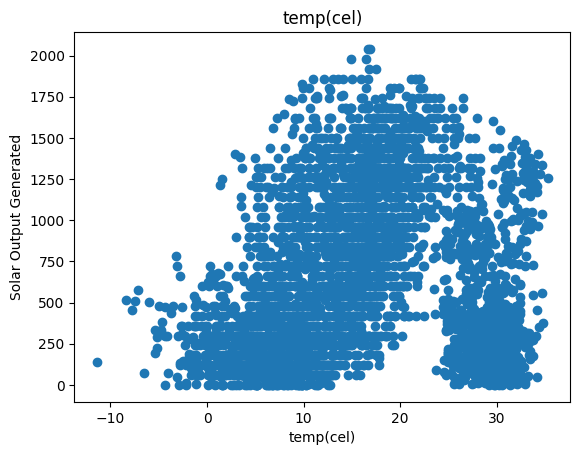

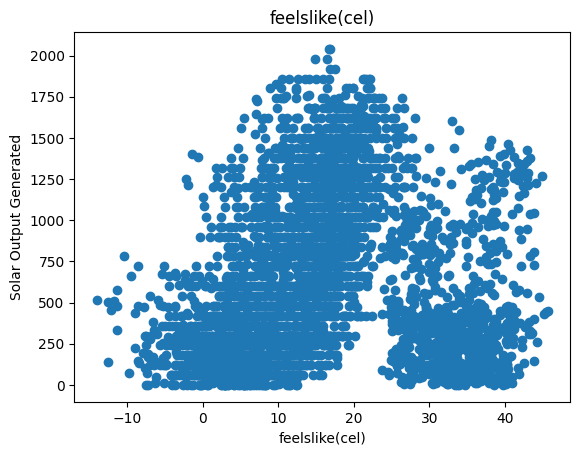

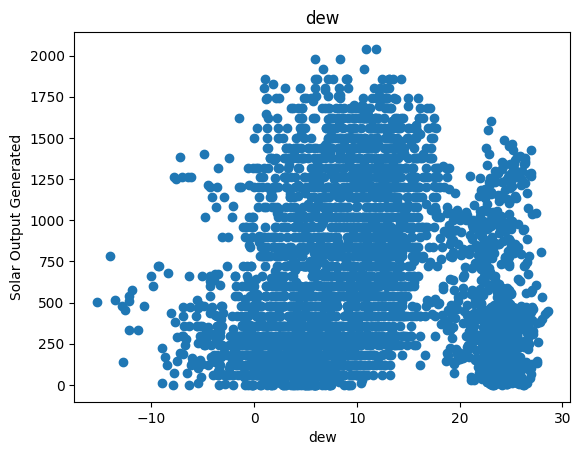

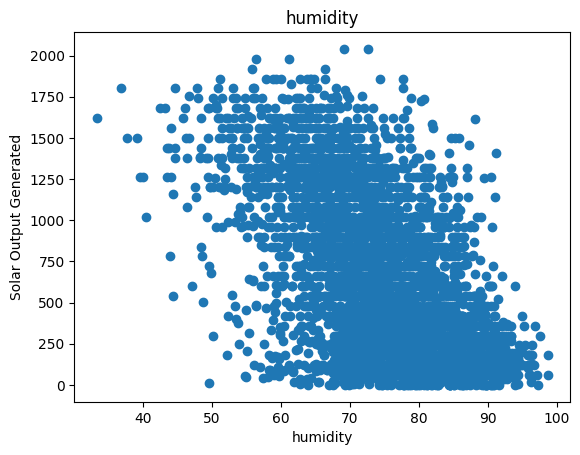

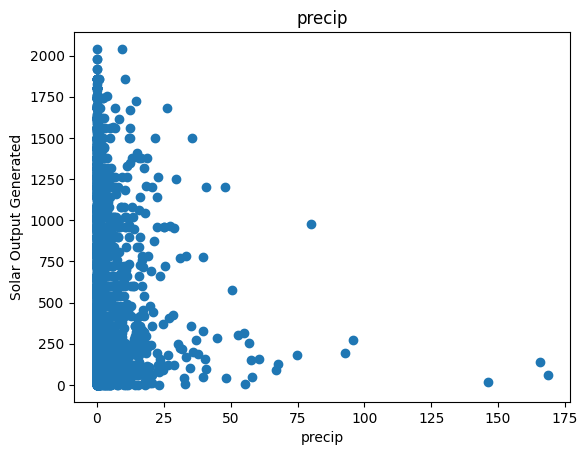

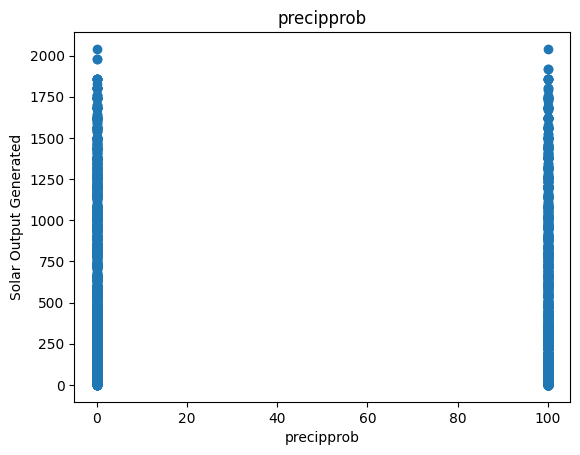

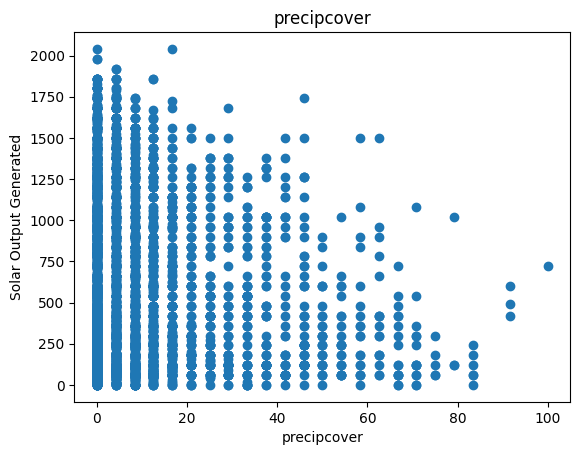

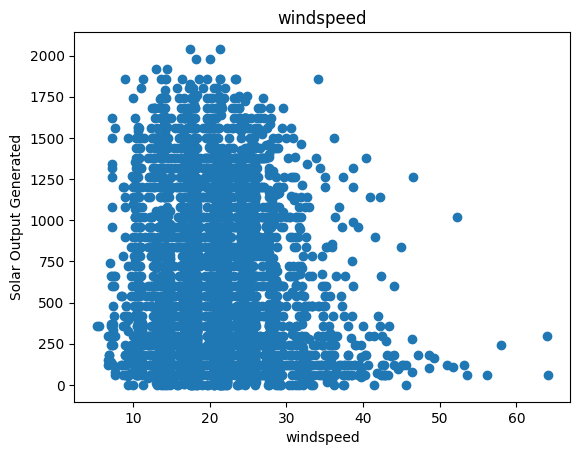

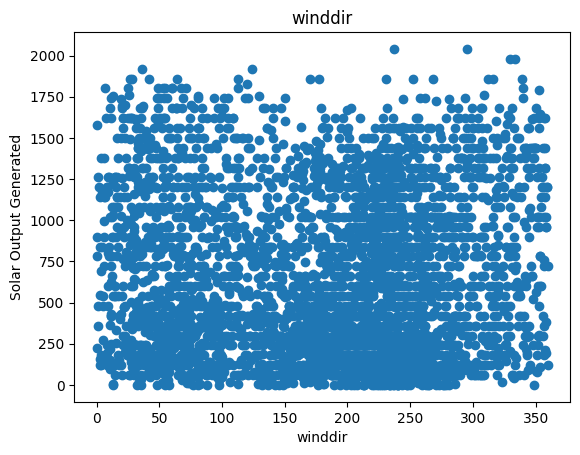

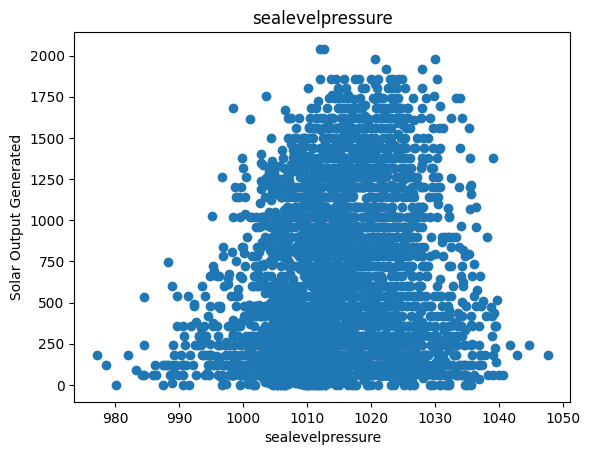

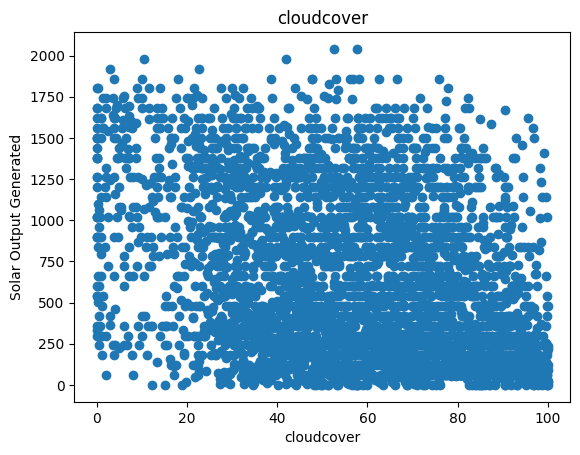

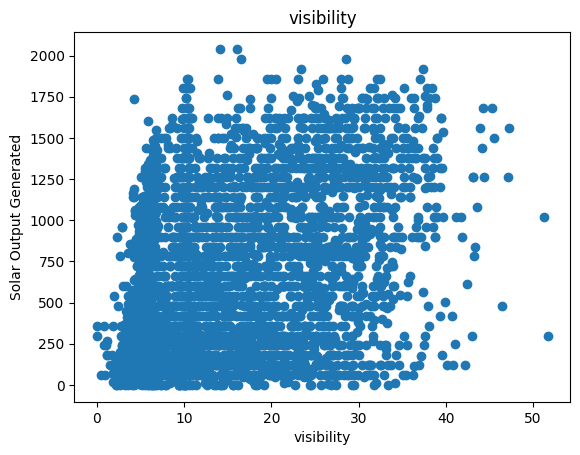

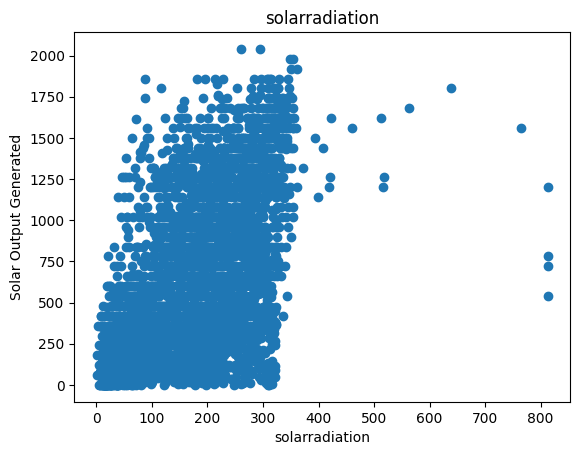

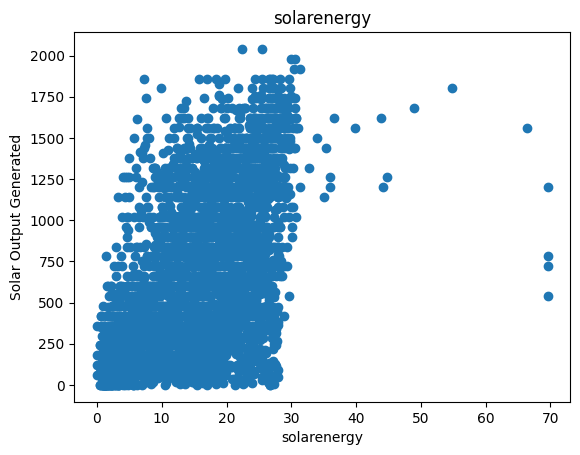

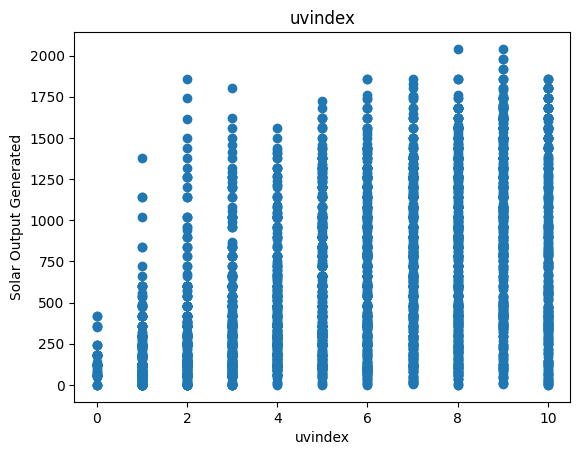

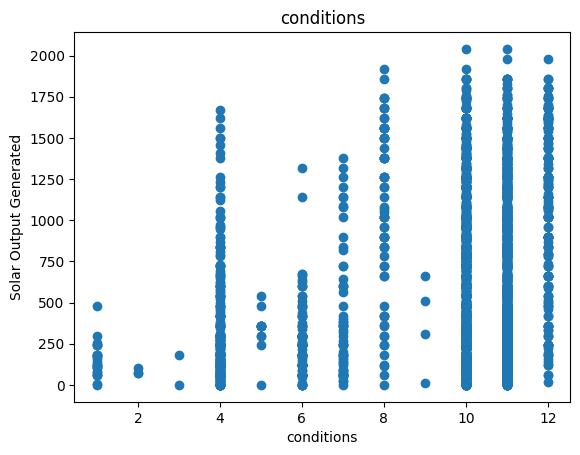

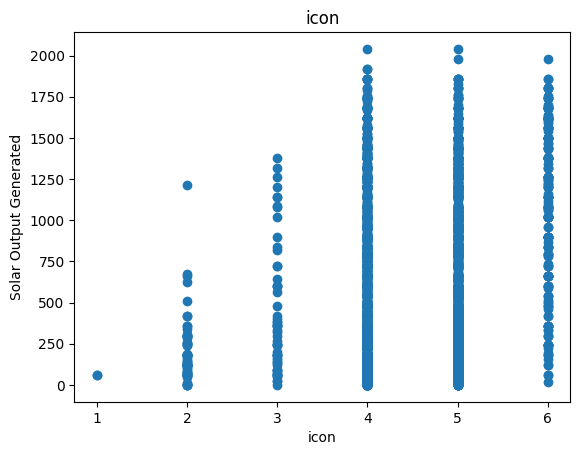

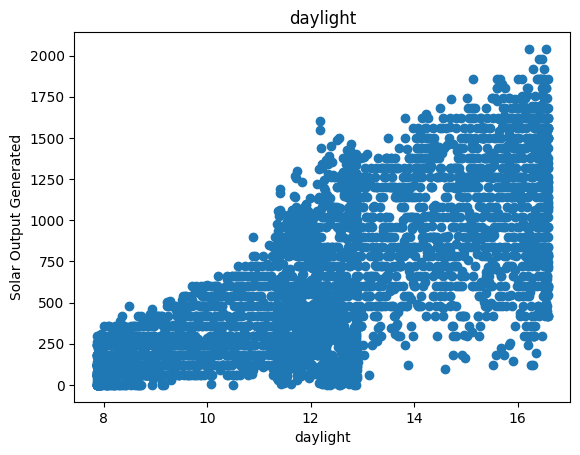

In [ ]:
for label in df.columns:
  if label != "solaroutput(kwh)":
        plt.scatter(df[label], df["solaroutput(kwh)"])
        plt.title(label)
        plt.ylabel("Solar Output Generated")
        plt.xlabel(label)
        plt.show()

In [ ]:
import copy
import seaborn as sns
import tensorflow as tf
from sklearn.linear_model import LinearRegression

# MULTIPLE LINEAR REGRESSION

In [ ]:
train, val, test = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))])

In [ ]:
def get_xy(dataframe, y_label, x_labels):
  dataframe = copy.deepcopy(dataframe)
  X = dataframe[x_labels].values
  y = dataframe[y_label].values.reshape(-1, 1)
  data = np.hstack((X, y))

  return data, X, y

In [ ]:
print(train, val, test)

      temp(cel)  feelslike(cel)   dew  humidity  precip  precipprob  \
2867       10.6            10.2   4.5      66.5   0.000           0   
3398       14.9            14.9  10.4      75.2   0.000           0   
1005        9.1             8.0   5.8      80.5   0.000           0   
3097        5.9             1.7   2.8      80.9   5.824         100   
2750        9.9             8.5   8.2      89.2   0.995         100   
...         ...             ...   ...       ...     ...         ...   
2647       23.6            23.7  15.7      63.5   0.043         100   
2861       10.1             9.0   4.3      68.6   2.011         100   
3470        0.4            -3.5  -4.0      72.3   0.000           0   
2695       10.0             9.9   6.5      80.0   0.000           0   
489        25.8            25.9  17.2      60.7   0.000           0   

      precipcover  windspeed  winddir  sealevelpressure  cloudcover  \
2867         0.00       24.9    266.3            1030.6        80.6   
3398 

In [ ]:
print(df.columns)

Index(['temp(cel)', 'feelslike(cel)', 'dew', 'humidity', 'precip',
       'precipprob', 'precipcover', 'windspeed', 'winddir', 'sealevelpressure',
       'cloudcover', 'visibility', 'solarradiation', 'solarenergy', 'uvindex',
       'conditions', 'icon', 'daylight', 'solaroutput(kwh)'],
      dtype='object')


In [ ]:
_, X_train_all, y_train_all = get_xy(train, "solaroutput(kwh)", x_labels=df.columns[:-1])
_, X_val_all, y_val_all = get_xy(val, "solaroutput(kwh)", x_labels=df.columns[:-1])
_, X_test_all, y_test_all = get_xy(test, "solaroutput(kwh)", x_labels=df.columns[:-1])

In [ ]:
all_reg = LinearRegression()
all_reg.fit(X_train_all, y_train_all)

LinearRegression()

In [ ]:
with open('multiple_linear_regression_for_solarpaneloutput.pkl', 'wb') as mlrfile:
  pickle.dump(all_reg, mlrfile)

In [ ]:
all_reg.score(X_test_all, y_test_all)

0.6484117153847808

In [ ]:
y_pred_lr = all_reg.predict(X_test_all)

In [ ]:
for i,j in zip(y_test_all, y_pred_lr):
  print(i, j)

[120.] [93.68027926]
[60.] [83.64655822]
[678.] [1033.99496659]
[240.] [546.24555133]
[1080.] [1036.13891399]
[480.] [285.34071176]
[900.] [1281.16670495]
[1020.] [1436.07673194]
[324.] [985.92036627]
[60.] [215.15258187]
[300.] [97.12227541]
[0.] [23.0075892]
[1440.] [935.86319233]
[634.4] [313.52070238]
[480.] [252.21434056]
[249.2] [240.02083267]
[1220.6] [597.12279026]
[420.] [661.49342076]
[240.] [93.09116456]
[720.] [1014.78453716]
[60.] [47.27295077]
[127.1] [189.23813514]
[240.] [142.68764028]
[1260.] [1148.00523592]
[302.5] [246.36225345]
[120.] [104.91661853]
[720.] [661.68082475]
[1380.] [1063.7687762]
[1020.] [564.20167771]
[60.] [-70.59537845]
[0.] [381.02540521]
[120.] [96.47364495]
[1320.] [1273.65673009]
[48.] [79.58546953]
[1200.] [1005.80591147]
[48.] [101.15314722]
[1038.] [813.99398021]
[1299.] [482.68269432]
[1320.] [840.01969614]
[119.1] [222.92761124]
[390.] [155.72717603]
[420.] [513.70461517]
[253.3] [390.69335091]
[420.] [215.77671417]
[184.6] [441.73647964]
[

In [ ]:
print(all_reg.predict([X_test_all[0]]))

[[93.68027926]]


In [ ]:
arr = np.array([24.8,	25.2,	19.1,	71.3,	0.000,	0,	0.00,	22.3,	15.4,	1014.4,	25.4,	6.0,	229.7,	19.7,	8,	4,	1,	11.360556])
print(all_reg.predict([arr]))

[[505.70066289]]


# MULTIPLE LINEAR REGRESSION WITH NEURAL NET

In [ ]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.xlabel('Epoch')
  plt.ylabel('MSE')
  plt.legend()
  plt.grid(True)
  plt.show()

In [ ]:
X_train_all

array([[10.6       , 10.2       ,  4.5       , ..., 11.        ,
         5.        , 14.23694444],
       [14.9       , 14.9       , 10.4       , ..., 11.        ,
         5.        , 11.44083333],
       [ 9.1       ,  8.        ,  5.8       , ..., 11.        ,
         5.        , 11.93333333],
       ...,
       [ 0.4       , -3.5       , -4.        , ..., 11.        ,
         5.        ,  7.91055556],
       [10.        ,  9.9       ,  6.5       , ..., 11.        ,
         5.        ,  9.72083333],
       [25.8       , 25.9       , 17.2       , ..., 11.        ,
         5.        , 11.65944444]])

In [ ]:
all_normalizer = tf.keras.layers.Normalization(input_shape=(None,), axis=-1)
all_normalizer.adapt(X_train_all)

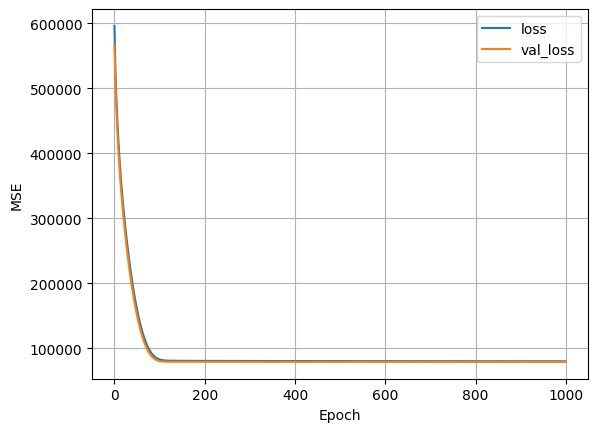

In [ ]:
all_nn_model = tf.keras.Sequential([
    all_normalizer,
    tf.keras.layers.Dense(1)
])
all_nn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.1), loss='mean_squared_error')
all_history = all_nn_model.fit(
    X_train_all, y_train_all,
    verbose=0,
    epochs=1000,
    validation_data=(X_val_all, y_val_all)
)
plot_loss(all_history)

In [ ]:
with open('multiple_linear_regression_with_neuralnet_for_solarpaneloutput.pkl', 'wb') as mlrnnfile:
  pickle.dump(all_nn_model, mlrnnfile)

In [ ]:
y_pred_mlrnn = all_nn_model.predict(X_test_all)

27/27 [==============================] - 0s 3ms/step


In [ ]:
for i,j in zip(y_test_all, y_pred_mlrnn):
  print(i, j)

[120.] [79.998535]
[60.] [102.14404]
[678.] [1108.0244]
[240.] [558.9574]
[1080.] [1054.6921]
[480.] [266.01587]
[900.] [1309.6838]
[1020.] [1438.4309]
[324.] [1012.955]
[60.] [200.80643]
[300.] [26.17041]
[0.] [-25.001526]
[1440.] [970.63513]
[634.4] [328.38873]
[480.] [277.5702]
[249.2] [254.73749]
[1220.6] [582.2395]
[420.] [660.19635]
[240.] [96.92761]
[720.] [1040.0623]
[60.] [-11.884949]
[127.1] [191.43878]
[240.] [187.9466]
[1260.] [1120.786]
[302.5] [235.37851]
[120.] [105.888275]
[720.] [703.83234]
[1380.] [1091.3628]
[1020.] [550.23883]
[60.] [-107.336426]
[0.] [460.25458]
[120.] [66.29767]
[1320.] [1262.3271]
[48.] [62.618164]
[1200.] [989.09485]
[48.] [122.419556]
[1038.] [800.79407]
[1299.] [506.40775]
[1320.] [838.97766]
[119.1] [205.40106]
[390.] [102.96704]
[420.] [519.1842]
[253.3] [501.80075]
[420.] [197.79657]
[184.6] [460.18054]
[420.] [654.0348]
[979.3] [336.43506]
[228.] [328.72592]
[660.] [837.2729]
[300.] [212.85657]
[660.] [802.7655]
[840.] [1151.7452]
[150.3] 

In [ ]:
print(all_nn_model.predict([X_test_all[0]]))

1/1 [==============================] - 0s 205ms/step
[[79.998535]]


In [ ]:
arr = np.array([24.8,	25.2,	19.1,	71.3,	0.000,	0,	0.00,	22.3,	15.4,	1014.4,	25.4,	6.0,	229.7,	19.7,	8,	4,	1,	11.360556])
print(all_nn_model.predict([arr]))

1/1 [==============================] - 0s 36ms/step
[[522.9636]]


In [ ]:
!pip install tensorflow_addons
import tensorflow_addons as tfa

# Make predictions using the trained model
y_pred = all_nn_model.predict(X_test_all)

# Calculate R-squared
r2_score = tfa.metrics.RSquare()
r2_score.update_state(y_test_all, y_pred_mlrnn)
r2_valuemlrnn = r2_score.result()


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 611.8/611.8 kB 5.4 MB/s eta 0:00:00
27/27 [==============================] - 0s 1ms/step


/usr/local/lib/python3.10/dist-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


In [ ]:
# Print the R-squared value
print("R-squared:", r2_valuemlrnn.numpy())

R-squared: 0.64057183


# NEURAL NET

In [ ]:
all_normalizer = tf.keras.layers.Normalization(input_shape=(None,), axis=-1)
all_normalizer.adapt(X_train_all)

In [ ]:
nn_model = tf.keras.Sequential([
    all_normalizer,
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)
])
nn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='mean_squared_error')

In [ ]:
history = nn_model.fit(
    X_train_all, y_train_all,
    validation_data=(X_val_all, y_val_all),
    verbose=0, epochs=100
)

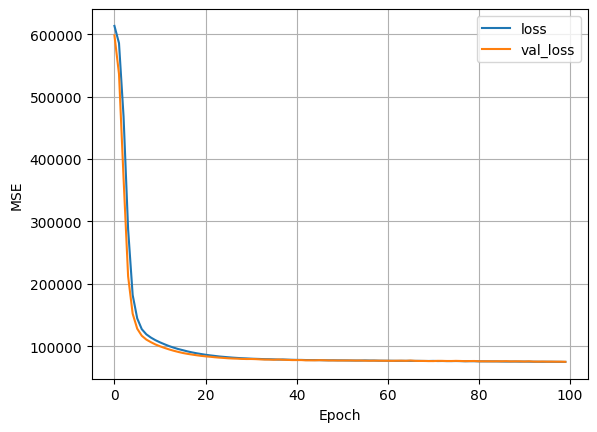

In [ ]:
plot_loss(history)

In [ ]:
y_pred_nn = nn_model.predict(X_test_all)

27/27 [==============================] - 0s 3ms/step


In [ ]:
for i,j in zip(y_test_all, y_pred_nn):
  print(i, j)

[120.] [189.32463]
[60.] [121.68563]
[678.] [1031.2762]
[240.] [431.86475]
[1080.] [1029.1289]
[480.] [281.67557]
[900.] [1373.7396]
[1020.] [1518.6475]
[324.] [864.1577]
[60.] [201.39903]
[300.] [178.04323]
[0.] [104.43159]
[1440.] [907.09314]
[634.4] [345.24033]
[480.] [239.9773]
[249.2] [257.36307]
[1220.6] [629.36816]
[420.] [620.44604]
[240.] [117.18836]
[720.] [1000.94006]
[60.] [127.3169]
[127.1] [160.33055]
[240.] [250.58899]
[1260.] [1116.7517]
[302.5] [166.53096]
[120.] [199.82602]
[720.] [651.96533]
[1380.] [1071.646]
[1020.] [514.5539]
[60.] [91.64357]
[0.] [512.04346]
[120.] [160.15584]
[1320.] [1289.8519]
[48.] [132.5441]
[1200.] [1041.0955]
[48.] [98.069435]
[1038.] [718.103]
[1299.] [545.34973]
[1320.] [831.6294]
[119.1] [236.30757]
[390.] [118.97577]
[420.] [456.93124]
[253.3] [484.3507]
[420.] [163.03053]
[184.6] [418.90952]
[420.] [594.8887]
[979.3] [429.34714]
[228.] [271.52725]
[660.] [814.9947]
[300.] [194.00197]
[660.] [719.115]
[840.] [1173.1285]
[150.3] [397.52

In [ ]:
print(nn_model.predict([X_test_all[0]]))

1/1 [==============================] - 0s 217ms/step
[[189.32463]]


In [ ]:
arr = np.array([24.8,	25.2,	19.1,	71.3,	0.000,	0,	0.00,	22.3,	15.4,	1014.4,	25.4,	6.0,	229.7,	19.7,	8,	4,	1,	11.360556])
print(nn_model.predict([arr]))

1/1 [==============================] - 0s 23ms/step
[[645.6021]]


In [ ]:
# Calculate R-squared
r2_score = tfa.metrics.RSquare()
r2_score.update_state(y_test_all, y_pred_nn)
r2_value = r2_score.result()

In [ ]:
# Print the R-squared value
print("R-squared:", r2_value.numpy())

R-squared: 0.6537404


# Trying out different numbers of layers of neural net by hint and trial

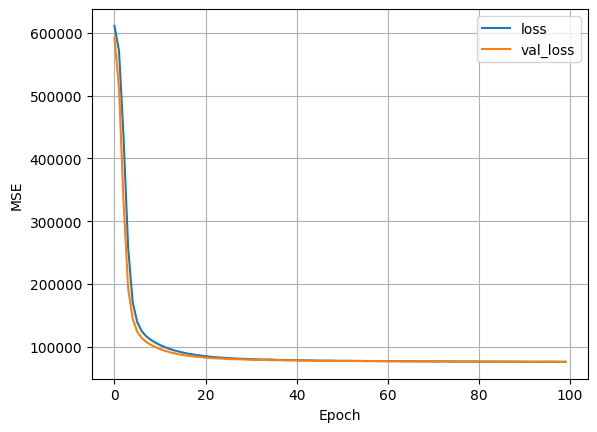

27/27 [==============================] - 0s 2ms/step
R-squared: 0.6519575


In [ ]:
all_normalizer = tf.keras.layers.Normalization(input_shape=(None,), axis=-1)
all_normalizer.adapt(X_train_all)

nn_model = tf.keras.Sequential([
    all_normalizer,
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)
])
nn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='mean_squared_error')

history = nn_model.fit(
    X_train_all, y_train_all,
    validation_data=(X_val_all, y_val_all),
    verbose=0, epochs=100
)
plot_loss(history)

y_pred_nn = nn_model.predict(X_test_all)
# Calculate R-squared
r2_score = tfa.metrics.RSquare()
r2_score.update_state(y_test_all, y_pred_nn)
r2_value = r2_score.result()
# Print the R-squared value
print("R-squared:", r2_value.numpy())

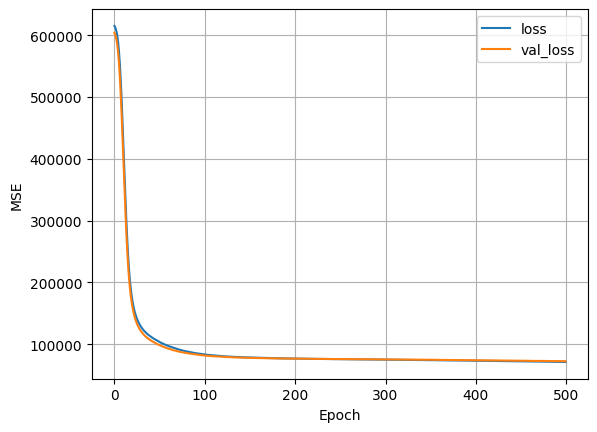

27/27 [==============================] - 0s 2ms/step
R-squared: 0.66250503


In [ ]:
all_normalizer = tf.keras.layers.Normalization(input_shape=(None,), axis=-1)
all_normalizer.adapt(X_train_all)

nn_model = tf.keras.Sequential([
    all_normalizer,
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1)
])
nn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), loss='mean_squared_error')

history = nn_model.fit(
    X_train_all, y_train_all,
    validation_data=(X_val_all, y_val_all),
    verbose=0, epochs=500
)
plot_loss(history)

y_pred_nn = nn_model.predict(X_test_all)
# Calculate R-squared
r2_score = tfa.metrics.RSquare()
r2_score.update_state(y_test_all, y_pred_nn)
r2_value = r2_score.result()
# Print the R-squared value
print("R-squared:", r2_value.numpy())

In [ ]:
with open('neuralnet_for_solarpaneloutput.pkl', 'wb') as nnfile:
  pickle.dump(nn_model, nnfile)

# DECISION TREE REGRESSOR



In [ ]:
from sklearn.tree import DecisionTreeRegressor

modeldtr = DecisionTreeRegressor()
modeldtr.fit(X_train_all, y_train_all)

DecisionTreeRegressor()

In [ ]:
y_pred_modeldtr = modeldtr.predict(X_test_all)

In [ ]:
with open('decision_tree_regressor_for_solarpaneloutput.pkl', 'wb') as dtrfile:
  pickle.dump(modeldtr, dtrfile)

In [ ]:
modeldtr.score(X_test_all, y_test_all)

0.40948917472852153

In [ ]:
for i,j in zip(y_test_all, y_pred_modeldtr):
  print(i, j)

[120.] 72.00000000004366
[60.] 150.0
[678.] 600.0
[240.] 606.0
[1080.] 1380.0
[480.] 180.0
[900.] 1140.0
[1020.] 1860.0
[324.] 1722.0000000000027
[60.] 240.0
[300.] 0.0
[0.] 180.0
[1440.] 900.0
[634.4] 829.4
[480.] 120.0
[249.2] 55.7
[1220.6] 6.4
[420.] 480.0
[240.] 125.99999999999795
[720.] 720.0
[60.] 120.0
[127.1] 198.3
[240.] 240.0
[1260.] 1320.0
[302.5] 475.7
[120.] 126.00000000002183
[720.] 600.0
[1380.] 1260.0
[1020.] 960.0
[60.] 120.0
[0.] 21.5
[120.] 60.0
[1320.] 1080.0
[48.] 293.9999999999782
[1200.] 1380.0
[48.] 90.0
[1038.] 371.9999999999891
[1299.] 591.6
[1320.] 900.0
[119.1] 244.4
[390.] 360.0
[420.] 540.0
[253.3] 323.3
[420.] 240.0
[184.6] 766.1
[420.] 1254.0000000000055
[979.3] 109.7
[228.] 420.0
[660.] 1320.0
[300.] 120.0
[660.] 540.0
[840.] 1458.000000000011
[150.3] 297.5
[660.] 545.999999999998
[600.] 1560.0
[540.] 1020.0
[60.] 120.0
[180.] 0.0
[557.9] 1096.2
[720.] 1260.0
[470.1] 1032.1
[1680.] 1080.0
[419.1] 108.2
[660.] 1353.6
[1020.] 738.0000000000109
[660.] 1620

In [ ]:
print(modeldtr.predict([X_test_all[0]]))

[72.]


In [ ]:
arr = np.array([24.8,	25.2,	19.1,	71.3,	0.000,	0,	0.00,	22.3,	15.4,	1014.4,	25.4,	6.0,	229.7,	19.7,	8,	4,	1,	11.360556])
print(modeldtr.predict([arr]))

[331.2]


# RIDGE  REGRESSION

In [ ]:
from sklearn.linear_model import Ridge, Lasso

In [ ]:
# Ridge Regression
ridge_model = Ridge()
ridge_model.fit(X_train_all, y_train_all)

ridge_y_pred = ridge_model.predict(X_test_all)

In [ ]:
with open('ridge_regressor_for_solarpaneloutput.pkl', 'wb') as rrfile:
  pickle.dump(ridge_model, rrfile)

In [ ]:
ridge_model.score(X_test_all, y_test_all)

0.6483961241915794

In [ ]:
for i,j in zip(y_test_all, ridge_y_pred):
  print(i, j)

[120.] [93.67794398]
[60.] [84.08029839]
[678.] [1034.94340906]
[240.] [546.2322603]
[1080.] [1036.20074498]
[480.] [285.10205234]
[900.] [1281.3645424]
[1020.] [1435.95593948]
[324.] [986.04252304]
[60.] [215.01815661]
[300.] [96.34486483]
[0.] [22.7775351]
[1440.] [936.02503268]
[634.4] [313.94693469]
[480.] [252.3051922]
[249.2] [240.04546373]
[1220.6] [596.97125797]
[420.] [661.49389041]
[240.] [93.02100235]
[720.] [1015.05529478]
[60.] [46.66349965]
[127.1] [189.41366088]
[240.] [143.18323586]
[1260.] [1147.64466932]
[302.5] [246.26395732]
[120.] [105.08505592]
[720.] [662.37383379]
[1380.] [1063.55407789]
[1020.] [563.88641938]
[60.] [-71.15501825]
[0.] [381.77171194]
[120.] [96.22690827]
[1320.] [1273.87254751]
[48.] [79.60088514]
[1200.] [1005.52138298]
[48.] [101.594513]
[1038.] [813.71433617]
[1299.] [483.15016535]
[1320.] [839.7705881]
[119.1] [222.54080539]
[390.] [155.1515665]
[420.] [513.60681912]
[253.3] [394.05540832]
[420.] [215.72523762]
[184.6] [441.96076434]
[420.] 

In [ ]:
print(ridge_model.predict([X_test_all[0]]))

[[93.67794398]]


In [ ]:
arr = np.array([24.8,	25.2,	19.1,	71.3,	0.000,	0,	0.00,	22.3,	15.4,	1014.4,	25.4,	6.0,	229.7,	19.7,	8,	4,	1,	11.360556])
print(ridge_model.predict([arr]))

[[506.44199547]]


# LASSO REGRESSION

In [ ]:
lasso_model = Lasso()
lasso_model.fit(X_train_all, y_train_all)

lasso_y_pred = lasso_model.predict(X_test_all)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.855e+07, tolerance: 5.929e+04
  model = cd_fast.enet_coordinate_descent(


In [ ]:
with open('lasso_regressor_for_solarpaneloutput.pkl', 'wb') as lrfile:
  pickle.dump(lasso_model, lrfile)

In [ ]:
for i,j in zip(y_test_all, lasso_y_pred):
  print(i, j)

[120.] 82.14266167439746
[60.] 103.38365725652147
[678.] 1081.154150712331
[240.] 547.330140259648
[1080.] 1040.6483649608526
[480.] 272.05013066494485
[900.] 1293.2414086652234
[1020.] 1432.3605421945595
[324.] 1002.2849592727216
[60.] 214.13724102258493
[300.] 60.354942680947715
[0.] 17.836624598633534
[1440.] 945.1850769213715
[634.4] 332.76533792324517
[480.] 256.55286346608045
[249.2] 240.24412958481844
[1220.6] 591.3716889573989
[420.] 661.5067198548568
[240.] 86.93346529157225
[720.] 1028.978878268067
[60.] 12.69506708622066
[127.1] 194.32143640751383
[240.] 163.0312803489869
[1260.] 1134.4277642059888
[302.5] 244.44858829275563
[120.] 109.92716777123678
[720.] 697.6240839480215
[1380.] 1055.7491394975568
[1020.] 551.3796126990792
[60.] -93.49393942807546
[0.] 411.381873463567
[120.] 81.20725124954424
[1320.] 1279.5370139225197
[48.] 86.02127910915442
[1200.] 999.4301745144576
[48.] 123.63399914694673
[1038.] 804.7590715243223
[1299.] 504.6319947527618
[1320.] 832.99650940436
[1

In [ ]:
lasso_model.score(X_test_all, y_test_all)

0.6454861384860455

In [ ]:
print(lasso_model.predict([X_test_all[0]]))

[82.14266167]


In [ ]:
arr = np.array([24.8,	25.2,	19.1,	71.3,	0.000,	0,	0.00,	22.3,	15.4,	1014.4,	25.4,	6.0,	229.7,	19.7,	8,	4,	1,	11.360556])
print(lasso_model.predict([arr]))

[558.37025855]


# ELASTIC NET

In [ ]:
from sklearn.linear_model import ElasticNet

# Create an ElasticNet model
elastic_net_model = ElasticNet()

# Train the model on the training data
elastic_net_model.fit(X_train_all, y_train_all)

# Make predictions on the test data
elastic_net_y_pred = elastic_net_model.predict(X_test_all)


In [ ]:
with open('elastic_net_for_solarpaneloutput.pkl', 'wb') as enfile:
  pickle.dump(elastic_net_model, enfile)

In [ ]:
for i,j in zip(y_test_all, elastic_net_y_pred):
  print(i, j)

[120.] 68.52444509387078
[60.] 160.68085353757033
[678.] 1115.4149741058427
[240.] 566.628308178495
[1080.] 1043.3207062971705
[480.] 293.4281517749805
[900.] 1255.0900059632504
[1020.] 1371.7059772947541
[324.] 986.0258688494732
[60.] 221.2143959974528
[300.] 37.67293151864396
[0.] 35.55148039393771
[1440.] 928.6905998328475
[634.4] 352.59349359127464
[480.] 307.354858396141
[249.2] 246.70234001471908
[1220.6] 629.5164634634257
[420.] 649.9334341270733
[240.] 115.82904825259993
[720.] 1003.6282659822755
[60.] -11.607345442590486
[127.1] 177.92224463858838
[240.] 249.23551778135152
[1260.] 1143.756511710848
[302.5] 295.2560345187285
[120.] 165.6395032513292
[720.] 724.6003344020046
[1380.] 1110.236505340501
[1020.] 534.1341797313526
[60.] -60.14022293810285
[0.] 505.0393675427167
[120.] 124.08152700180017
[1320.] 1272.3667634792364
[48.] 145.40722375958376
[1200.] 927.8834085909739
[48.] 177.80279610974685
[1038.] 780.9165165313525
[1299.] 539.4479372608957
[1320.] 747.037618711789
[11

In [ ]:
elastic_net_model.score(X_test_all, y_test_all)

0.6328103352861207

In [ ]:
print(elastic_net_model.predict([X_test_all[0]]))

[68.52444509]


In [ ]:
arr = np.array([24.8,	25.2,	19.1,	71.3,	0.000,	0,	0.00,	22.3,	15.4,	1014.4,	25.4,	6.0,	229.7,	19.7,	8,	4,	1,	11.360556])
print(elastic_net_model.predict([arr]))

[604.36258606]


# GRADIENT BOOSTING MACHINES

In [ ]:
import xgboost as xgb

# Create an XGBoost model
gbm_model = xgb.XGBRegressor()

# Train the model on the training data
gbm_model.fit(X_train_all, y_train_all)

# Make predictions on the test data
gbm_y_pred = gbm_model.predict(X_test_all)

In [ ]:
with open('gradient_boosting_machines_for_solarpaneloutput.pkl', 'wb') as gbmfile:
  pickle.dump(gbm_model, gbmfile)

In [ ]:
gbm_model.score(X_test_all, y_test_all)

0.6260021572009865

In [ ]:
print(gbm_model.predict([X_test_all[0]]))

[196.57544]


In [ ]:
arr = np.array([24.8,	25.2,	19.1,	71.3,	0.000,	0,	0.00,	22.3,	15.4,	1014.4,	25.4,	6.0,	229.7,	19.7,	8,	4,	1,	11.360556])
print(gbm_model.predict([arr]))

[279.87012]


In [ ]:
for i,j in zip(y_test_all, gbm_y_pred):
  print(i, j)

[120.] 196.57544
[60.] 30.584019
[678.] 1137.4802
[240.] 326.61407
[1080.] 1232.3335
[480.] 280.7926
[900.] 1364.1772
[1020.] 1127.0375
[324.] 808.45044
[60.] 151.03522
[300.] 163.09288
[0.] 104.29555
[1440.] 984.142
[634.4] 282.47025
[480.] 308.58054
[249.2] 266.4239
[1220.6] 472.81564
[420.] 835.8624
[240.] 128.09189
[720.] 1059.0321
[60.] 220.05737
[127.1] 144.63399
[240.] 242.8167
[1260.] 1122.1027
[302.5] 228.67152
[120.] 98.51021
[720.] 552.86255
[1380.] 816.825
[1020.] 505.62863
[60.] 97.69586
[0.] -18.53373
[120.] 130.67825
[1320.] 1239.4945
[48.] 127.30079
[1200.] 1042.401
[48.] 85.632645
[1038.] 869.74615
[1299.] 743.46655
[1320.] 979.4584
[119.1] 274.06458
[390.] 185.53288
[420.] 803.7061
[253.3] 366.6168
[420.] 302.6717
[184.6] 324.64337
[420.] 786.01733
[979.3] 180.76526
[228.] 288.17392
[660.] 978.33075
[300.] 132.97153
[660.] 443.70337
[840.] 1160.8225
[150.3] 205.02718
[660.] 502.11505
[600.] 1081.6267
[540.] 949.2191
[60.] 135.48393
[180.] 136.33237
[557.9] 830.6802
[7

#SUPPORT VECTOR REGRESSION


In [ ]:
from sklearn.svm import SVR

# Create an SVR model with a radial basis function (RBF) kernel
svr_model = SVR(kernel='rbf')

# Train the model on the training data
svr_model.fit(X_train_all, y_train_all)

# Make predictions on the test data
svr_y_pred = svr_model.predict(X_test_all)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
with open('support_vector_regression_for_solarpaneloutput.pkl', 'wb') as svrfile:
  pickle.dump(svr_model, svrfile)

In [ ]:
svr_model.score(X_test_all, y_test_all)

-0.03908215727547981

In [ ]:
print(svr_model.predict([X_test_all[0]]))

arr = np.array([24.8,	25.2,	19.1,	71.3,	0.000,	0,	0.00,	22.3,	15.4,	1014.4,	25.4,	6.0,	229.7,	19.7,	8,	4,	1,	11.360556])
print(svr_model.predict([arr]))

for i,j in zip(y_test_all, svr_y_pred):
  print(i, j)

[438.01338573]
[498.73517278]
[120.] 438.0133857333764
[60.] 441.0275813796159
[678.] 488.89793055399986
[240.] 457.05431030703915
[1080.] 504.3571134173381
[480.] 441.0285934187697
[900.] 486.75119145866887
[1020.] 501.6267683997413
[324.] 480.70402252149574
[60.] 442.9683122171353
[300.] 434.91716475721165
[0.] 434.7294356156332
[1440.] 486.64077343574564
[634.4] 482.34441618838105
[480.] 449.2398403194938
[249.2] 464.6036666729935
[1220.6] 518.4933852171667
[420.] 478.87025226195465
[240.] 432.6155840955737
[720.] 509.358828606061
[60.] 433.13886575950147
[127.1] 453.93563181069715
[240.] 434.92199979165986
[1260.] 507.4996068328548
[302.5] 490.4674614962687
[120.] 443.9144684256072
[720.] 457.4830822032901
[1380.] 493.9329742027733
[1020.] 456.0020090044203
[60.] 436.04259284947125
[0.] 517.9117813515937
[120.] 442.8315389337616
[1320.] 512.4056536802851
[48.] 439.8644701630672
[1200.] 468.89848693052664
[48.] 442.37011938460773
[1038.] 474.02055433031313
[1299.] 507.8889143636875


# Comparing the accuracies of various models

# Multiple Linear Regression

In [ ]:
all_reg.score(X_test_all, y_test_all)

0.6484117153847808

# Multiple Linear Regression with Neural Net

In [ ]:
print("R-squared:", r2_valuemlrnn.numpy())

R-squared: 0.64057183


# Neural Net

In [ ]:
print("R-squared:", r2_value.numpy())

R-squared: 0.66250503


# Decision Tree Regressor

In [ ]:
modeldtr.score(X_test_all, y_test_all)

0.40948917472852153

# Ridge Regression

In [ ]:
ridge_model.score(X_test_all, y_test_all)

0.6483961241915794

# Lasso Regression

In [ ]:
lasso_model.score(X_test_all, y_test_all)

0.6454861384860455

# Elastic Net

In [ ]:
elastic_net_model.score(X_test_all, y_test_all)

0.6328103352861207

# Gradient Boosting Machines

In [ ]:
gbm_model.score(X_test_all, y_test_all)

0.6260021572009865

# Support Vector Machines

In [ ]:
svr_model.score(X_test_all, y_test_all)

-0.03908215727547981